In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
GEI_DIR = 'data/gei/Normal Walk'
file_template = '{}/normal_{}_1.avi_{}.png'

def get_id_and_num(filename):
    els = filename.split('_')
    id = els[1]
    num=els[3].split('.')[0]
    return id, num

files = os.listdir(GEI_DIR)
ids_and_nums = [get_id_and_num(f) for f in files]
ids = set([el[0] for el in ids_and_nums])

training     = [file_template.format(GEI_DIR, id, num) for id, num in sorted(ids_and_nums) if num != '1']
test         = [file_template.format(GEI_DIR, id, num) for id, num in sorted(ids_and_nums) if num == '1']
train_labels = [id for id, num in sorted(ids_and_nums) if num != '1']
test_labels  = [id for id, num in sorted(ids_and_nums) if num == '1']
print(train_labels)
print(training)

def load_data(file_list):
    data = np.array([cv2.imread(f)[:,:,0].flatten() for f in file_list])
    
    print(data.shape)
    return data

train_data = load_data(training)
test_data  = load_data(test)

['id001', 'id001', 'id002', 'id002', 'id003', 'id003', 'id003', 'id004', 'id004', 'id005', 'id005', 'id006', 'id006', 'id007', 'id007', 'id008', 'id008', 'id008', 'id009', 'id009', 'id009', 'id010', 'id010', 'id011', 'id011', 'id011', 'id012', 'id012', 'id013', 'id013', 'id014', 'id014', 'id015', 'id015', 'id016', 'id016', 'id017', 'id017', 'id018', 'id018', 'id019', 'id019', 'id020', 'id020', 'id021', 'id021', 'id022', 'id022', 'id023', 'id023', 'id024', 'id024', 'id025', 'id025', 'id026', 'id026', 'id027', 'id027', 'id028', 'id028', 'id029', 'id029', 'id030', 'id030', 'id031', 'id031', 'id031', 'id032', 'id032', 'id032', 'id033', 'id033', 'id033', 'id034', 'id034', 'id034', 'id035', 'id035', 'id035']
['data/gei/Normal Walk/normal_id001_1.avi_2.png', 'data/gei/Normal Walk/normal_id001_1.avi_3.png', 'data/gei/Normal Walk/normal_id002_1.avi_2.png', 'data/gei/Normal Walk/normal_id002_1.avi_3.png', 'data/gei/Normal Walk/normal_id003_1.avi_2.png', 'data/gei/Normal Walk/normal_id003_1.avi_3

In [50]:
pca = PCA(n_components=15)
pca.fit(train_data)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)  
train_reduced = pca.transform(train_data)
print(train_reduced.shape)
train_reconstructed = pca.inverse_transform(train_reduced)
print(train_reconstructed.shape)
test_reduced = pca.transform(test_data)
print(test_reduced.shape)

[0.3560002  0.13455438 0.10700103 0.05552992 0.04471131 0.03189392
 0.02415401 0.02147554 0.01856863 0.01647186 0.01380017 0.01311905
 0.01145347 0.01000088 0.00903474]
[34214.75239608 21034.74266297 18757.81535622 13513.00042771
 12125.42591549 10240.99752041  8912.15766883  8403.5028298
  7814.08598224  7359.69240168  6736.44042063  6568.09502375
  6137.01118408  5734.655778    5450.62355713]
(79, 15)
(79, 46070)
(140, 15)


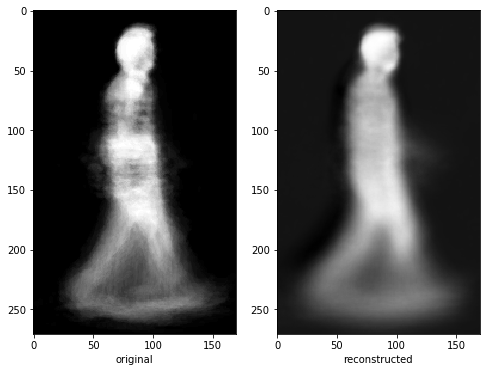

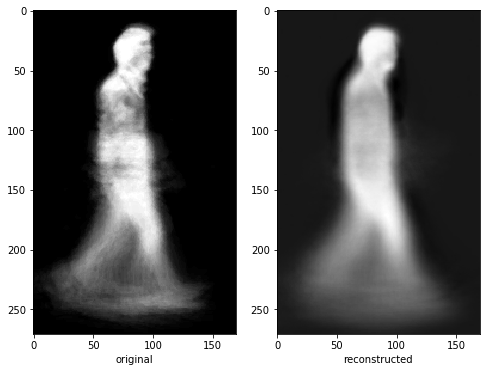

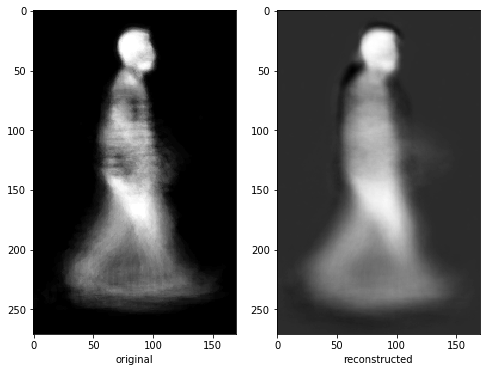

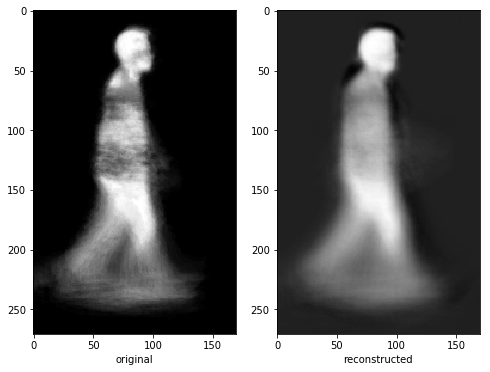

In [30]:
def show_side_by_side(img1, img2, ):
    plt.figure(figsize=[8,8])
    ax = plt.subplot(121)
    ax.imshow(np.reshape(img1, (271,170)), cmap='gray')
    ax.set_xlabel('original')
    ax = plt.subplot(122)
    ax.imshow(np.reshape(img2, (271,170)), cmap='gray')
    ax.set_xlabel('reconstructed')
    
for i in range(4):
    show_side_by_side(train_data[i], train_reconstructed[i])



In [51]:
lda = LinearDiscriminantAnalysis(n_components=20, solver='eigen')
lda.fit(train_reduced, train_labels)
train_lda_transformed = lda.transform(train_reduced)
train_lda_transformed.shape
test_lda_transformed = lda.transform(test_reduced)
test_lda_transformed.shape


(140, 15)

In [52]:
n_neighbors=5
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(train_lda_transformed, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [33]:
index = 4

probs = clf.predict_proba([test_lda_transformed[index]])
print(probs)
prediction = clf.predict([test_lda_transformed[index]])
'prediction for test record {}: true={}, prediction={}'.format(index, test_labels[index], prediction)

[[0.         0.         0.         0.         0.59744771 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.14086241
  0.         0.         0.         0.         0.26168988 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]]


"prediction for test record 4: true=id005, prediction=['id005']"

In [34]:
predictions = clf.predict(test_lda_transformed)
for label, pred in zip(test_labels, predictions):
    if label == pred:
        result = 'CORRECT'
    else:
        result = 'WRONG'
    print('label={}; prediction={}    {}'.format(label, pred, result))
num_correct = sum(predictions == test_labels)
'{} correct out of {} (Accuracy={:.2f})'.format(num_correct, len(predictions), num_correct * 1. /len(predictions))

label=id001; prediction=id001    CORRECT
label=id002; prediction=id002    CORRECT
label=id003; prediction=id003    CORRECT
label=id004; prediction=id004    CORRECT
label=id005; prediction=id005    CORRECT
label=id006; prediction=id006    CORRECT
label=id007; prediction=id007    CORRECT
label=id008; prediction=id008    CORRECT
label=id009; prediction=id009    CORRECT
label=id010; prediction=id021    WRONG
label=id011; prediction=id011    CORRECT
label=id012; prediction=id012    CORRECT
label=id013; prediction=id013    CORRECT
label=id014; prediction=id014    CORRECT
label=id015; prediction=id015    CORRECT
label=id016; prediction=id016    CORRECT
label=id017; prediction=id017    CORRECT
label=id018; prediction=id018    CORRECT
label=id019; prediction=id019    CORRECT
label=id020; prediction=id020    CORRECT
label=id021; prediction=id021    CORRECT
label=id022; prediction=id022    CORRECT
label=id023; prediction=id023    CORRECT
label=id024; prediction=id024    CORRECT
label=id025; predi

'34 correct out of 35 (Accuracy=0.97)'

Now test Hand in Pocket data with the model created from Normal Walk

In [48]:
GEI_DIR = 'data/gei/Hand in Pocket'
file_template = '{}/hand_in_pocket_{}_2.avi_{}.png'

def get_id_and_num(filename):
    els = filename.split('_')
    id = els[3]
    num=els[5].split('.')[0]
    return id, num

files = os.listdir(GEI_DIR)
ids_and_nums = [get_id_and_num(f) for f in files]
ids = set([el[0] for el in ids_and_nums])

test         = [file_template.format(GEI_DIR, id, num) for id, num in sorted(ids_and_nums)]
test_labels  = [id for id, num in sorted(ids_and_nums)]

def load_data(file_list):
    data = np.array([cv2.imread(f)[:,:,0].flatten() for f in file_list])
    
    print(data.shape)
    return data

test_data  = load_data(test)

(140, 46070)


In [53]:
# Run PCA
test_reduced = pca.transform(test_data)
print(test_reduced.shape)

# Run LDA
test_lda_transformed = lda.transform(test_reduced)
test_lda_transformed.shape

# Predict with KNN
predictions = clf.predict(test_lda_transformed)
for label, pred in zip(test_labels, predictions):
    if label == pred:
        result = 'CORRECT'
    else:
        result = 'WRONG'
    print('label={}; prediction={}    {}'.format(label, pred, result))
num_correct = sum(predictions == test_labels)
'{} correct out of {} (Accuracy={:.2f})'.format(num_correct, len(predictions), num_correct * 1. /len(predictions))

(140, 15)
label=id001; prediction=id001    CORRECT
label=id001; prediction=id001    CORRECT
label=id001; prediction=id001    CORRECT
label=id001; prediction=id001    CORRECT
label=id002; prediction=id002    CORRECT
label=id002; prediction=id002    CORRECT
label=id002; prediction=id002    CORRECT
label=id002; prediction=id002    CORRECT
label=id003; prediction=id003    CORRECT
label=id003; prediction=id003    CORRECT
label=id003; prediction=id003    CORRECT
label=id003; prediction=id003    CORRECT
label=id004; prediction=id004    CORRECT
label=id004; prediction=id004    CORRECT
label=id004; prediction=id004    CORRECT
label=id004; prediction=id004    CORRECT
label=id005; prediction=id005    CORRECT
label=id005; prediction=id005    CORRECT
label=id005; prediction=id005    CORRECT
label=id005; prediction=id005    CORRECT
label=id006; prediction=id006    CORRECT
label=id006; prediction=id006    CORRECT
label=id006; prediction=id006    CORRECT
label=id006; prediction=id006    CORRECT
label=

'133 correct out of 140 (Accuracy=0.95)'